In [1]:
# Importando bibliotecas necessárias
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Carregando a base de dados de câncer de mama
# Esta base contém características de tumores (como tamanho e textura) e a classificação (benigno ou maligno)
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)  # Características
y = data.target  # Rótulos (0 = maligno, 1 = benigno)

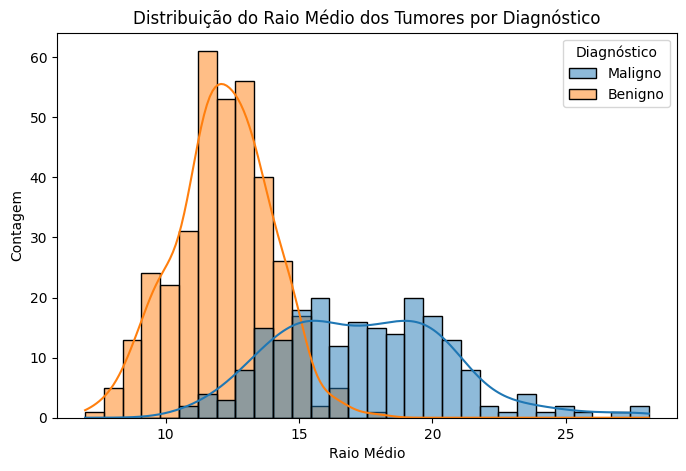

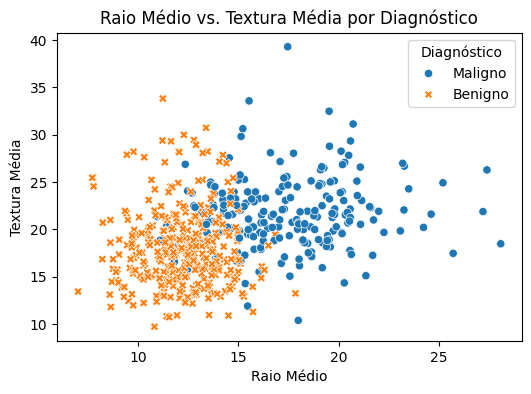

In [10]:
# Convertendo para DataFrame para facilitar a visualização
df = X.copy()
df['Diagnóstico'] = ['Benigno' if label == 1 else 'Maligno' for label in y]
    
# Visualizando a distribuição de uma característica (exemplo: mean radius)
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='mean radius', hue='Diagnóstico', bins=30, kde=True)
plt.title('Distribuição do Raio Médio dos Tumores por Diagnóstico')
plt.xlabel('Raio Médio')
plt.ylabel('Contagem')
plt.show()
    
# Visualizando a correlação entre duas características
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='mean radius', y='mean texture', hue='Diagnóstico', style='Diagnóstico')
plt.title('Raio Médio vs. Textura Média por Diagnóstico')
plt.xlabel('Raio Médio')
plt.ylabel('Textura Média')
plt.show()

In [11]:
# Dividindo os dados em treino (80%) e teste (20%)
# O conjunto de treino é usado para ensinar o modelo, e o de teste para avaliar sua performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Criando e treinando o modelo de Regressão Logística
# Este modelo aprende a prever se um tumor é benigno ou maligno com base nas características
model = LogisticRegression(max_iter=10000)  # max_iter aumentado para garantir convergência
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [13]:
# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

In [14]:
# Calculando métricas de desempenho
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Exibindo métricas
print(f"Acurácia: {accuracy:.2f} ({accuracy*100:.1f}% de diagnósticos corretos)")
print(f"Precisão: {precision:.2f} (proporção de casos identificados como benignos que realmente são benignos)")
print(f"Recall: {recall:.2f} (proporção de casos benignos corretamente identificados)")
print(f"F1-Score: {f1:.2f} (média harmônica entre precisão e recall)")


Acurácia: 0.96 (95.6% de diagnósticos corretos)
Precisão: 0.95 (proporção de casos identificados como benignos que realmente são benignos)
Recall: 0.99 (proporção de casos benignos corretamente identificados)
F1-Score: 0.97 (média harmônica entre precisão e recall)


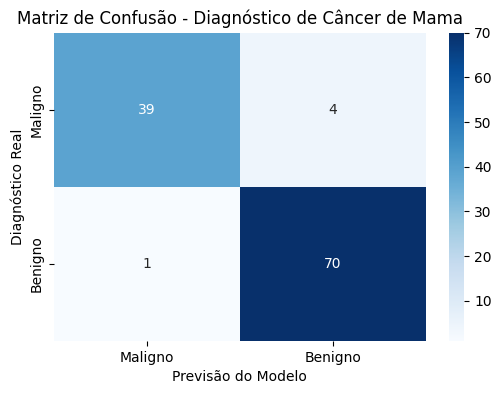

In [15]:
# Criando a matriz de confusão
# A matriz mostra como o modelo classificou os casos em relação ao diagnóstico real
cm = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Maligno", "Benigno"], 
            yticklabels=["Maligno", "Benigno"])
plt.title("Matriz de Confusão - Diagnóstico de Câncer de Mama")
plt.xlabel("Previsão do Modelo")
plt.ylabel("Diagnóstico Real")
plt.show()